# <font color=green>deepBreaks Applications</font>
## Modeling spectral tuning sites of opsin proteins based on amino-acid sequence...  

# <font color=red>STEP 3: deepBreaks</font>
## THIS IS A LONG SECTION! 
### **Output** = folder containing all results from model training, including comparison of model performances, an amino-acid site importance report + figures, and the top 5 trained models in a .pkl file format.

In [19]:
# importing deepBreaks libraries 
from deepBreaks.utils import get_models, get_scores, get_params, make_pipeline, get_simp_params
from deepBreaks.preprocessing import MisCare, ConstantCare, URareCare, CustomOneHotEncoder, AminoAcidPropertyEncoder
from deepBreaks.preprocessing import FeatureSelection, CollinearCare
from deepBreaks.preprocessing import read_data
from deepBreaks.models import model_compare_cv, finalize_top, importance_from_pipe, mean_importance, summarize_results
from deepBreaks.visualization import plot_scatter, dp_plot, plot_imp_model, plot_imp_all
from deepBreaks.preprocessing import write_fasta
import warnings
import datetime
import os
import shutil 

In [20]:
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [65]:
# defining user params, file pathes, analysis type

#assign your path to folder containing all the datasplits
path = './vpod_1.1_data_subsets_2024-05-02'
# path to sequences of interest
seqFileName = f'{path}/wt_aligned_VPOD_1.1_het.fasta' 
# path to corresponding metadata of interest
metaDataFileName = f'{path}/wt_meta.tsv' 

# name of the phenotype
mt = 'Lambda_Max'

# type of the sequences
seq_type = 'aa'

# type of the analysis if it is a classification model, then we put cl instead of reg
ana_type = 'reg' 

gap_threshold = 0.50

#Whether or not you want to drop the reference sequence from the training data- Usually 'Bovine' or 'Squid'
drop_ref = False


In [22]:
props_to_keep = ['H1','NCI']

In [66]:
# making a unique directory for saving the reports of the analysis
print('direcory preparation')
dt_label = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
seqFile = seqFileName.split('/')[2]
#print(seqFile)
seqFile = seqFile.split('.')[0]
#print(seqFile)
report_dir = str(seqFile +'_' + mt + '_' + dt_label)
os.makedirs(report_dir)

direcory preparation


In [67]:
%%time
print('reading meta-data')
# importing metadata
meta_data = read_data(metaDataFileName, seq_type = None, is_main=False)
# importing sequences data
print('reading fasta file')

tr = read_data(seqFileName, seq_type = seq_type, is_main=True, gap_threshold=gap_threshold)

shutil.copy2(f'{seqFileName}',report_dir)
write_fasta(dat = tr, fasta_file = f'{seqFile}_gap_dropped.fasta' , report_dir = report_dir)

reading meta-data
reading fasta file
wt_aligned_VPOD_1_gap_dropped.fasta was saved successfully
CPU times: total: 219 ms
Wall time: 235 ms


In [68]:
try:
    reference_seq = tr.loc['Bovine'].copy()
    ref_seq_name = 'bovine'
    if drop_ref == True:
        meta_data = meta_data.drop('Bovine')
    #print(bovine)
except:
    reference_seq = tr.loc['Squid'].copy()
    ref_seq_name = 'squid'
    #print(squid)
reference_seq.to_csv(path_or_buf= f'{report_dir}/ref_sequence.csv',index = True,mode="w")

In [69]:
tr = tr.merge(meta_data.loc[:, mt],  left_index=True, right_index=True)
tr.shape

(362, 355)

In [70]:
tr.head(10)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p346,p347,p348,p349,p350,p351,p352,p353,p354,Lambda_Max
Bovine,M,NaN,N,G,T,E,G,P,N,F,...,NaN,NaN,NaN,S,Q,V,A,P,A,500.0
S1,M,NaN,N,G,T,E,G,P,Y,F,...,S,A,NaN,S,S,V,S,P,A,502.0
S2,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,A,NaN,S,S,V,S,P,A,502.0
S3,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,A,NaN,S,S,V,S,P,A,481.0
S4,NaN,NaN,NaN,NaN,T,E,G,P,F,F,...,S,A,NaN,S,S,V,S,P,A,494.0
S5,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,A,NaN,S,S,V,S,P,A,494.0
S6,M,NaN,N,G,T,E,G,P,F,F,...,S,A,NaN,S,S,V,S,P,A,491.0
S7,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,A,NaN,S,S,V,S,P,A,486.0
S8,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,A,NaN,S,S,V,S,P,A,490.0
S9,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,A,NaN,S,S,V,S,P,A,490.0


In [71]:
print(tip_to_fold)

{'Bovine': 9, 'S1': 9, 'S2': 9, 'S4': 9, 'S3': 9, 'S8': 9, 'S9': 9, 'S5': 9, 'S6': 9, 'S7': 9, 'S10': 9, 'S11': 9, 'S12': 9, 'S14': 9, 'S45': 9, 'S17': 9, 'S18': 9, 'S19': 9, 'S41': 9, 'S42': 9, 'S44': 9, 'S47': 9, 'S46': 9, 'S23': 9, 'S31': 9, 'S13': 9, 'S24': 9, 'S29': 9, 'S36': 9, 'S27': 9, 'S37': 9, 'S38': 9, 'S43': 9, 'S15': 9, 'S22': 9, 'S26': 8, 'S28': 8, 'S16': 8, 'S34': 8, 'S35': 8, 'S25': 8, 'S20': 8, 'S21': 8, 'S30': 8, 'S32': 8, 'S33': 8, 'S39': 8, 'S53': 8, 'S55': 8, 'S57': 8, 'S63': 8, 'S58': 8, 'S64': 8, 'S56': 8, 'S67': 8, 'S66': 8, 'S65': 8, 'S356': 8, 'S54': 8, 'S62': 8, 'S71': 8, 'S111': 8, 'S167': 8, 'S338': 8, 'S191': 8, 'S357': 8, 'S358': 8, 'S359': 8, 'S361': 8, 'S360': 8, 'S70': 3, 'S110': 3, 'S177': 3, 'S179': 3, 'S50': 3, 'S51': 3, 'S59': 3, 'S52': 3, 'S69': 3, 'S192': 3, 'S49': 3, 'S48': 3, 'S60': 3, 'S178': 3, 'S180': 3, 'S73': 3, 'S144': 3, 'S140': 3, 'S147': 3, 'S146': 3, 'S145': 3, 'S193': 3, 'S269': 3, 'S141': 3, 'S148': 3, 'S290': 3, 'S288': 3, 'S142': 

In [72]:
tr = tr.reindex(tip_to_fold.keys())

In [73]:
tr.head(10)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p346,p347,p348,p349,p350,p351,p352,p353,p354,Lambda_Max
Bovine,M,NaN,N,G,T,E,G,P,N,F,...,NaN,NaN,NaN,S,Q,V,A,P,A,500.0
S1,M,NaN,N,G,T,E,G,P,Y,F,...,S,A,NaN,S,S,V,S,P,A,502.0
S2,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,A,NaN,S,S,V,S,P,A,502.0
S4,NaN,NaN,NaN,NaN,T,E,G,P,F,F,...,S,A,NaN,S,S,V,S,P,A,494.0
S3,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,A,NaN,S,S,V,S,P,A,481.0
S8,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,A,NaN,S,S,V,S,P,A,490.0
S9,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,A,NaN,S,S,V,S,P,A,490.0
S5,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,A,NaN,S,S,V,S,P,A,494.0
S6,M,NaN,N,G,T,E,G,P,F,F,...,S,A,NaN,S,S,V,S,P,A,491.0
S7,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,A,NaN,S,S,V,S,P,A,486.0


In [32]:
import numpy as np
import csv
import pandas as pd

In [74]:
y = tr.loc[:, mt].values
tr.drop(mt, axis=1, inplace=True)
print('Shape of data is: ', tr.shape)

Shape of data is:  (362, 354)


In [75]:
y_ev = 1239.8 / np.array(y)
print(y_ev)

[2.4796     2.46972112 2.46972112 2.5097166  2.57754678 2.53020408
 2.53020408 2.5097166  2.52505092 2.55102881 2.48456914 2.5148073
 2.48955823 2.48456914 2.5148073  2.54057377 2.54579055 2.48955823
 2.4796     2.52505092 2.5097166  2.53537832 2.5199187  2.54057377
 2.53020408 2.50464646 2.4746507  2.4550495  2.4746507  2.4796
 2.54057377 2.52505092 2.4945674  2.5199187  2.4945674  2.49959677
 2.48955823 2.4746507  2.56157025 2.54057377 2.45992063 2.46972112
 2.4796     2.4796     2.48955823 2.46972112 2.46481113 2.46972112
 2.46972112 2.55628866 2.35703422 2.55102881 2.53537832 2.49959677
 2.55102881 2.44536489 2.5199187  2.45992063 2.4746507  2.56687371
 2.56687371 2.4550495  2.46481113 2.46972112 2.55102881 2.76124722
 2.76741071 2.69521739 2.71291028 2.72483516 2.45992063 2.5199187
 2.44055118 2.46972112 2.4746507  2.4746507  2.55102881 2.57219917
 2.58830898 2.58830898 2.4746507  2.4746507  2.55628866 2.4550495
 2.48955823 2.36603053 2.36603053 2.24195298 2.33483992 2.27486239
 2

**Attention**: metadata and sequences data should have the names as their row names and for each sequence their must be a value in the meta data file.

In [76]:
print('metadata looks like this:')
meta_data.head(10)

metadata looks like this:


,Lambda_Max,Species,Opsin_Family,Phylum,Class,Accession,Mutations
Bovine,500.0,Bos_tarus,Rh1,Chordata,Mammalia,NM_001014890,NaN
S1,502.0,Neoniphon_sammara,Rh1,Chordata,Actinopteri,U57536.1,NaN
S2,502.0,Neoniphon_argenteus,Rh1,Chordata,Actinopteri,U57540.1,NaN
S3,481.0,Neoniphon_aurolineatus,Rh1,Chordata,Actinopteri,U57541.1,NaN
S4,494.0,Sargocentron_punctatissimum,Rh1,Chordata,Actinopteri,U57543.1,NaN
S5,494.0,Sargocentron_microstoma,Rh1,Chordata,Actinopteri,U57542.1,NaN
S6,491.0,Sargocentron_diadema,Rh1,Chordata,Actinopteri,U57537.1,NaN
S7,486.0,Sargocentron_xantherythrum,Rh1,Chordata,Actinopteri,U57546.1,NaN
S8,490.0,Sargocentron_spiniferum,Rh1,Chordata,Actinopteri,U57544.1,NaN
S9,490.0,Sargocentron_tiere,Rh1,Chordata,Actinopteri,U57545.1,NaN


In [77]:
print('sequence data looks like this:')
tr.head(10)

sequence data looks like this:


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p345,p346,p347,p348,p349,p350,p351,p352,p353,p354
Bovine,M,NaN,N,G,T,E,G,P,N,F,...,NaN,NaN,NaN,NaN,S,Q,V,A,P,A
S1,M,NaN,N,G,T,E,G,P,Y,F,...,S,S,A,NaN,S,S,V,S,P,A
S2,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,S,A,NaN,S,S,V,S,P,A
S4,NaN,NaN,NaN,NaN,T,E,G,P,F,F,...,S,S,A,NaN,S,S,V,S,P,A
S3,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,S,A,NaN,S,S,V,S,P,A
S8,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,S,A,NaN,S,S,V,S,P,A
S9,NaN,NaN,NaN,NaN,T,E,G,P,D,F,...,S,S,A,NaN,S,S,V,S,P,A
S5,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,S,A,NaN,S,S,V,S,P,A
S6,M,NaN,N,G,T,E,G,P,F,F,...,S,S,A,NaN,S,S,V,S,P,A
S7,NaN,NaN,NaN,NaN,T,E,G,P,Y,F,...,S,S,A,NaN,S,S,V,S,P,A


### Preprocessing
In this step, we do all these steps:
1. dropping columns with a number of missing values above a certain threshold  
2. dropping zero entropy columns  
3. imputing missing values with the mode of that column  
4. replacing cases with a frequency below a threshold (default 1.5%) with the mode of that column
5. dropping zero entropy columns
6. use statistical tests (each position against the phenotype) and drop columns with p-values below a threshold (default 0.25)
7. one-hot encode the remaining columns
8. calculate the pair-wise distance matrix for all of the columns
9. use the distance matrix for DBSCAN and cluster the correlated positions together
10. keep only one column (closes to center of each cluster) for each group and drop the rest from the training data set

In [91]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('ur', URareCare(threshold=0.025)),
        ('cc2', ConstantCare()),
        ('one_hot', CustomOneHotEncoder()),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.15, keep=False)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.001, keep=False))
    ])

In [137]:
prep_pipeline = make_pipeline(
    steps=[
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.10, keep=False)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.1, keep=False)),
    ])

In [114]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('aa_prop', AminoAcidPropertyEncoder(props_to_keep = props_to_keep)),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.10, keep=False)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.001, keep=False))
    ])

In [79]:
tr_hot = prep_pipeline[:5].fit_transform(tr)

In [81]:
tr2 = tr_hot.merge(df, left_index=True, right_index=True)
tr2.shape

(362, 1666)

In [ ]:
tr_aa_prop = prep_pipeline[:3].transform(tr)

In [119]:
tr3 = tr_aa_prop.merge(df, left_index=True, right_index=True)
tr3.shape

(362, 1060)

In [237]:
block_fold_alt = list(group_labels.values())
print(block_fold_alt)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 1

In [135]:
%%time
report, top = model_compare_cv(X=tr3, y=y, preprocess_pipe=prep_pipeline,
                               models_dict=get_models(ana_type=ana_type),
                               scoring=get_scores(ana_type=ana_type),
                               report_dir=report_dir,
                               cv=10, ana_type=ana_type, cache_dir=report_dir)

Fitting rf...
Fitting Adaboost...
Fitting et...
Fitting gbr...
Fitting dt...
Fitting lr...
Fitting Lasso...
Fitting LassoLars...
Fitting BayesianRidge...
Fitting HubR...
Fitting lgbm...
Fitting xgb...
CPU times: total: 13.4 s
Wall time: 27.9 s


MAE = Mean Absolute Error

MSE = Mean Squared Error

RMSE = Rooted Mean Square Error

MAPE = Mean Absolute % Error - the average magnitude of error produced by a model, or how far off predictions are on average. A MAPE value of 20% means that the average absolute percentage difference between the predictions and the actuals is 20%

In [136]:
report

,R2,MAE,MSE,RMSE,MAPE
et,9.356145e-01,7.414685e+00,2.096335e+02,1.361596e+01,1.591672e-02
lgbm,9.274954e-01,8.513266e+00,2.377334e+02,1.402426e+01,1.840707e-02
xgb,9.272034e-01,8.062004e+00,2.371880e+02,1.472917e+01,1.693081e-02
gbr,9.212942e-01,9.068774e+00,2.578239e+02,1.490822e+01,1.931423e-02
rf,9.163277e-01,9.269191e+00,2.732583e+02,1.529292e+01,2.000110e-02
BayesianRidge,9.157477e-01,1.023490e+01,2.683671e+02,1.584274e+01,2.215493e-02
Adaboost,9.018547e-01,1.282146e+01,3.204065e+02,1.731261e+01,2.769034e-02
HubR,8.757106e-01,1.200273e+01,3.989719e+02,1.939713e+01,2.604914e-02
dt,8.557096e-01,1.037512e+01,4.713205e+02,2.027166e+01,2.197194e-02
LassoLars,8.352845e-01,1.662787e+01,5.480640e+02,2.264280e+01,3.674661e-02


In [240]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('ur', URareCare(threshold=0.025)),
        ('cc2', ConstantCare()),
        ('one_hot', CustomOneHotEncoder()),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.10, keep=True)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.001, keep=True))
    ])

In [37]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('aa_prop', AminoAcidPropertyEncoder(props_to_keep = props_to_keep)),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.10, keep=True)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.001, keep=True))
    ])

In [241]:
modified_top = []
mtml = []
for model in top:
    modified_top.append(make_pipeline(steps=[('prep', prep_pipeline), model.steps[-1]]))
    my_top_models = str(model[1:])
    #print(my_top_models)
    my_top_models = my_top_models.split("'")[3]
    mtml.append(my_top_models)
    #print(my_top_models)

In [242]:
modified_top[0]

Pipeline(steps=[('prep',
                 Pipeline(steps=[('mc', MisCare(missing_threshold=0.05)),
                                 ('cc', ConstantCare()),
                                 ('ur', URareCare(threshold=0.025)),
                                 ('cc2', ConstantCare()),
                                 ('one_hot', CustomOneHotEncoder()),
                                 ('feature_selection',
                                  FeatureSelection(alpha=0.1, keep=True,
                                                   model_type='reg')),
                                 ('collinear_care',
                                  CollinearCare(dist_method='correlation',
                                                keep=True,
                                                threshold=0.001))])),
                ('gbr', GradientBoostingRegressor(random_state=123))])

In [244]:
%%time
top = finalize_top(X=tr, y=y, top_models=modified_top, grid_param=get_params(),report_dir=report_dir, cv=block_fold_alt)


Tuning gbr...
No Grid-Search Specified, fitting model to default parameters.
Tuning lgbm...
Beginning Grid Search
Best Model R-squared:	0.12193576290185996
Tuning BayesianRidge...
Beginning Grid Search


KeyboardInterrupt: 

In [ ]:
%%time
sr = summarize_results(top_models=top, report_dir=report_dir)

CPU times: total: 1.27 s
Wall time: 1.26 s


In [ ]:
sr.head()

,feature,p_value,score,xgb,Adaboost,HubR,rf,gbr,mean
0,p1_GAP,0.219579,1.512379,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,p1_M,0.012788,6.260621,0.000014,0.0,0.018589,0.000559,0.0,0.003832
2,p2_DNHLVYP,0.070072,3.300942,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,p2_G,0.077795,3.128217,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,p2_GAP,0.000732,11.604172,0.000371,0.0,0.283567,0.000093,0.0,0.056806


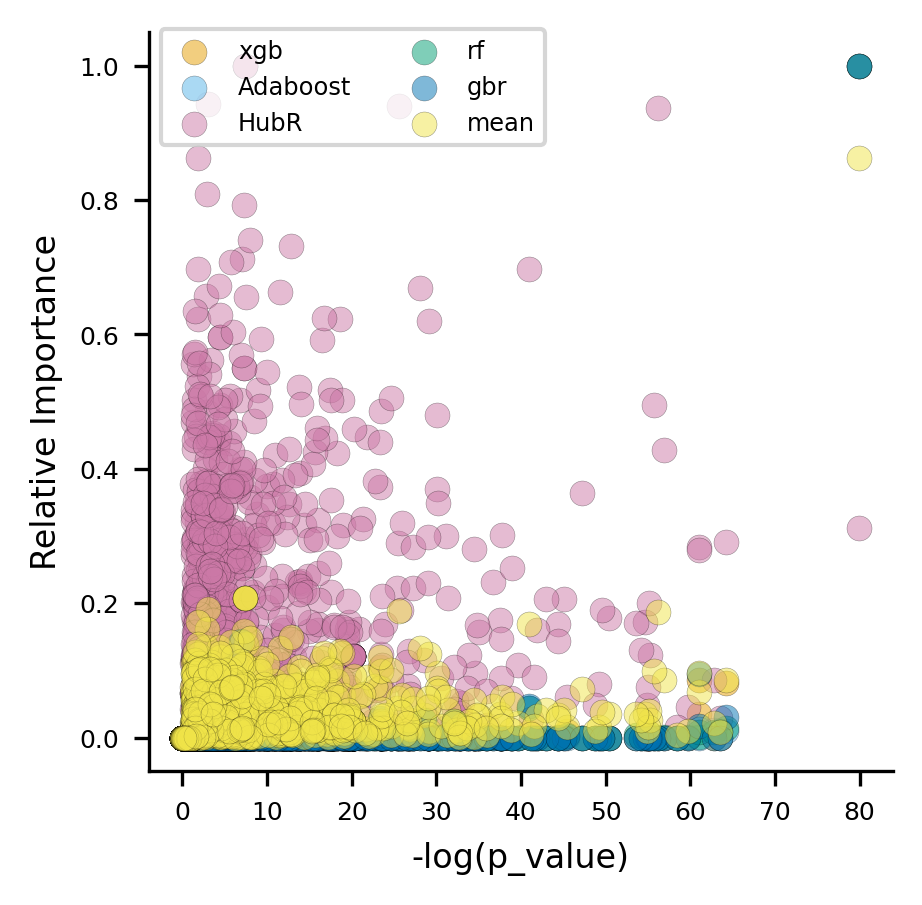

In [ ]:
scatter_plot = plot_scatter(summary_result=sr, report_dir=report_dir)

In [ ]:
%%time
mean_imp = mean_importance(top, report_dir=report_dir)

CPU times: total: 484 ms
Wall time: 450 ms


mean Done


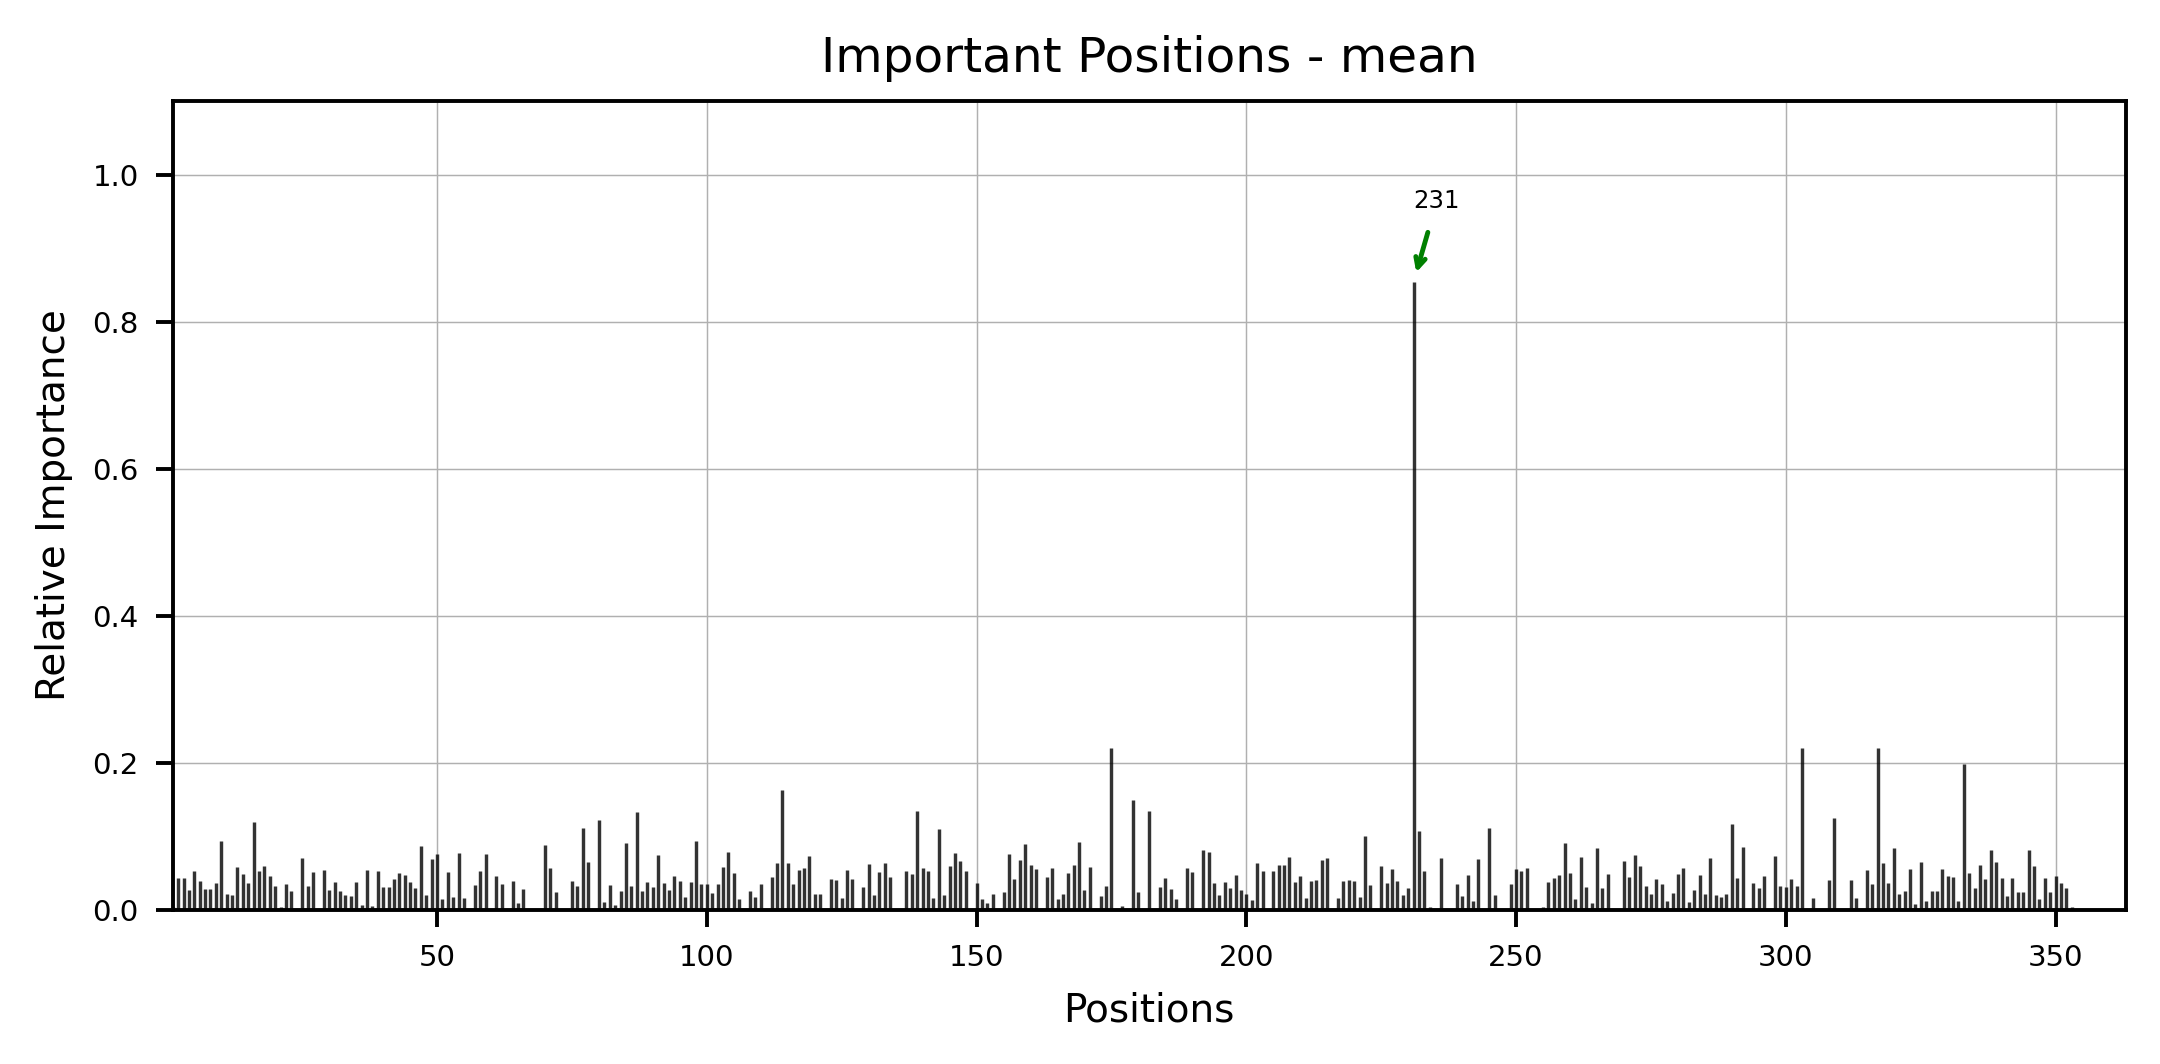

In [ ]:
dp_plot(importance=mean_imp,imp_col='mean', model_name='mean', report_dir=report_dir)

In [ ]:
tr = prep_pipeline[:4].fit_transform(tr)

xgb Done


AttributeError: PathCollection.set() got an unexpected keyword argument 'legend'

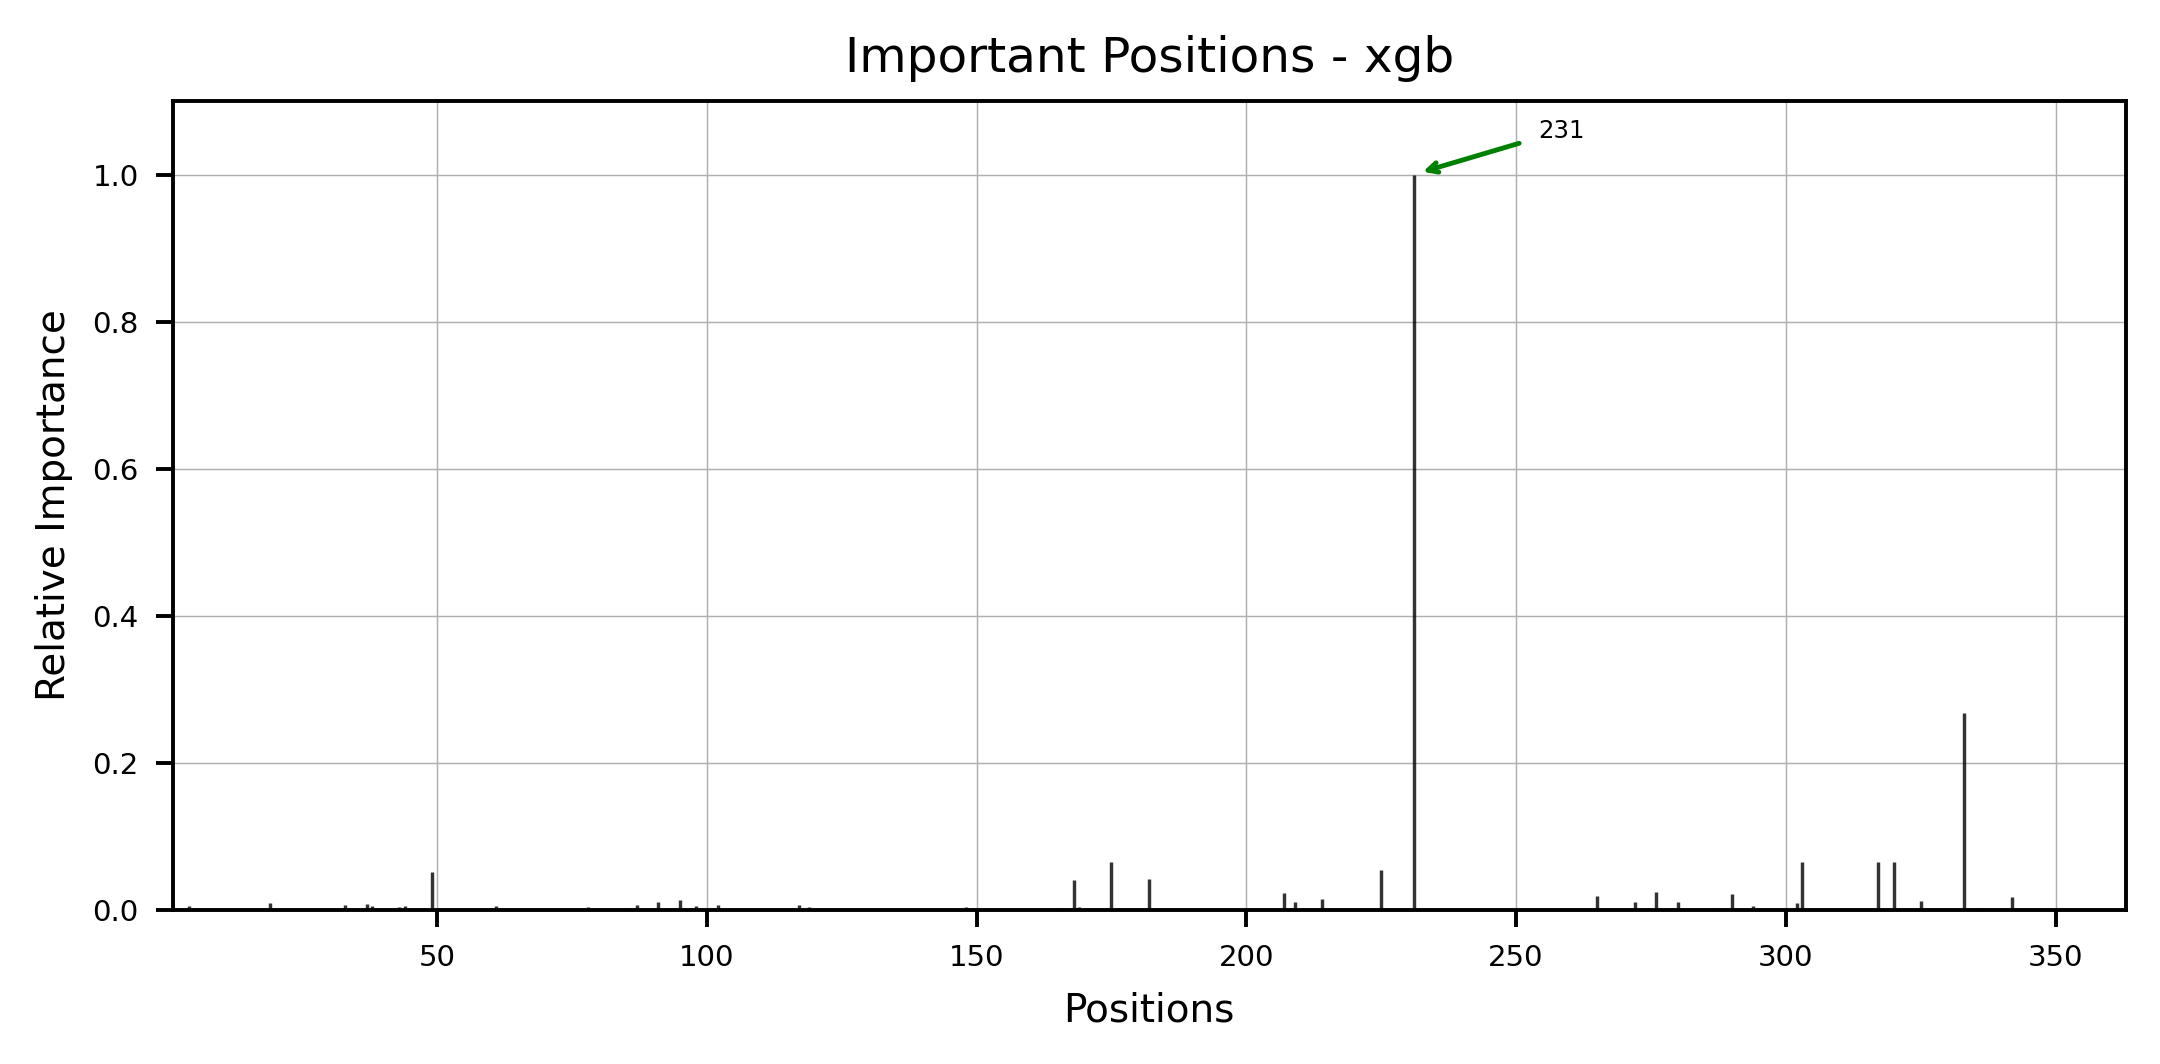

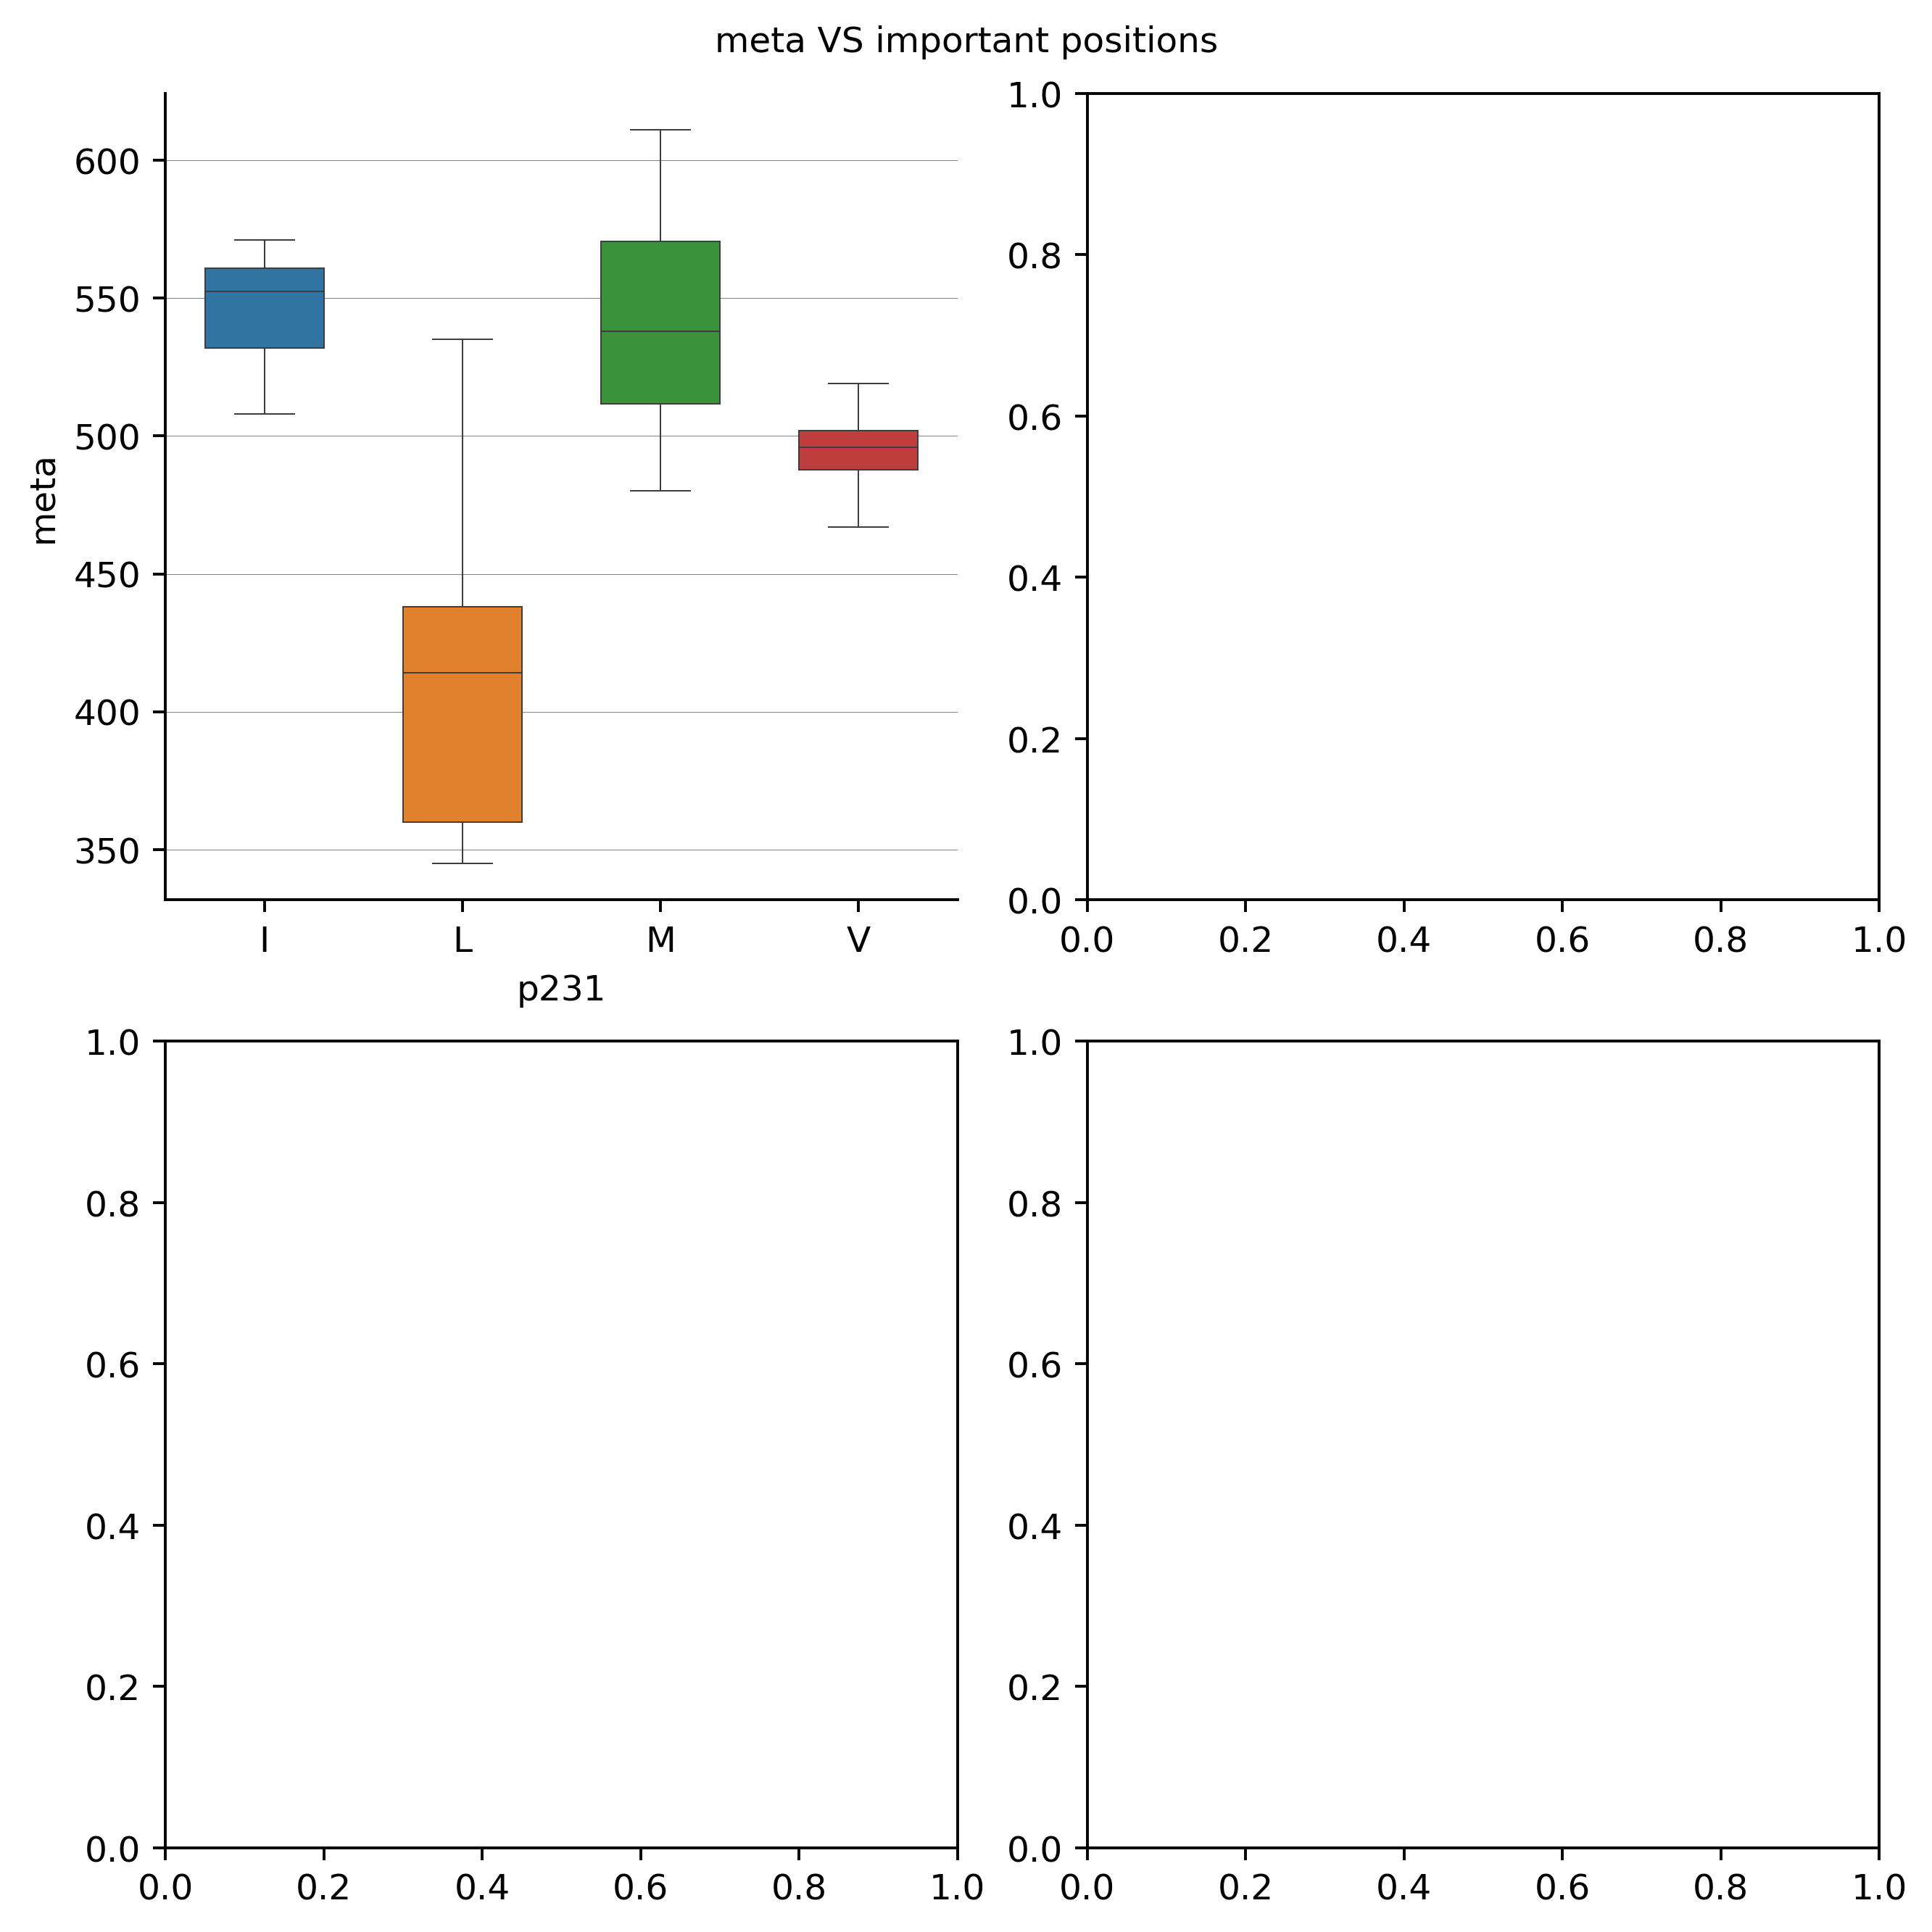

In [ ]:
for model in top:
    model_name = model.steps[-1][0]
    dp_plot(importance=importance_from_pipe(model),
            imp_col='standard_value',
            model_name = model_name, report_dir=report_dir)
    
    plot_imp_model(importance=importance_from_pipe(model), 
               X_train=tr, y_train=y, model_name=model_name,
                   meta_var='meta', model_type=ana_type, report_dir=report_dir)

In [ ]:
pl = plot_imp_all(final_models=top,
                  X_train=tr, y_train=y,
                  model_type = ana_type,
                  report_dir=report_dir, max_plots=100,
                  figsize=(2.5, 3))

In [134]:
from deepBreaks.utils import load_obj
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [135]:
top_per_mod = report_dir + '/' + mtml[0] + '.pkl'
load_top_mod = load_obj(top_per_mod)

FileNotFoundError: [Errno 2] No such file or directory: 'wt_vert_aligned_VPOD_1_Lambda_Max_2024-07-22_16-18-44/gbr.pkl'

In [ ]:
print(f'Here is a list of your top performing models to test...\n{mtml}')

# <font color=red>STEP 4: Translate Candidate STSs</font> 
## This section is used to translate candidate STSs to the bovine or squid equivalent.
### The bovine and squid sequence dataframes that were saved earlier and are called again here


In [137]:
import pandas as pd
import os

In [140]:
#STEP 4: Translate Candidate STSs 
#translate candidate STSs to the bovine or squid equivalent 
#bovine and squid sequence dataframes were saved earlier and are called again here
m = 0
tm = ''
k=0
gaps=0
#import importance_report.csv from report_dir
true_pos = []
aa = []
tmd = []
df = pd.read_csv(f'{report_dir}\importance_report.csv')
#take the list of important sites and translate them to the bovine standard equivalent, 
#we do this by taking the site number and subtracting the number of '-' between the start of the sequence and the desired site. 
for rows in reference_seq.values:  
    rows = str(rows)
    #print(rows)
    if rows == 'nan':
    #We want to write the 'true_pos', 'aa', and 'TMD' to the 'importance_report' csv file
        gaps += 1
        k += 1
        true_pos.append('NA')
        aa.append('-')
        tmd.append('NA')
    else:
        #print("The number of gaps is " + str(gaps))
        k+=1
        trans_site = k - gaps
        if ref_seq_name == 'bovine':
            if trans_site in range(3,37):
                tm = 'N-Termina'
            elif trans_site in range(37,62):
                tm = '1'
            elif trans_site in range(74,96):
                tm = '2'
            elif trans_site in range(111,133):
                tm = '3'
            elif trans_site in range(153,174):
                tm = '4'
            elif trans_site in range(203,225):
                tm = '5'
            elif trans_site in range(253,275):
                tm = '6'
            elif trans_site in range(287,309):
                tm = '7'
            else:
                tm = 'CT/EC'
        else:
            if trans_site in range(3,34):
                tm = 'N-Termina'
            elif trans_site in range(34,59):
                tm = '1'
            elif trans_site in range(71,97):
                tm = '2'
            elif trans_site in range(110,132):
                tm = '3'
            elif trans_site in range(152,173):
                tm = '4'
            elif trans_site in range(200,225):
                tm = '5'
            elif trans_site in range(262,284):
                tm = '6'
            elif trans_site in range(294,315):
                tm = '7'
            else:
                tm = 'CT/EC'                
        
        true_pos.append(str(trans_site))
        aa.append(rows)
        tmd.append(tm)
true_pos.pop()
aa.pop()
tmd.pop()

df['true_position'] = true_pos
df['TMD'] = tmd
df['amino_acid'] = aa
df.to_csv(path_or_buf= os.path.join(report_dir,r'importance_report.csv'),index = 'Feature',mode="w")
#df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'wt_vert_aligned_VPOD_1_Lambda_Max_2024-07-22_16-18-44\\importance_report.csv'

# <font color=red>STEP 5: Query the Model to Predict NEW Sequences</font> 
## Takes new sequences, inserts them into existing alignment to properly format for model query, then returns prediction of the λmax value for each sequence...

In [142]:
import os
import subprocess
from deepBreaks.utils import load_obj
from deepBreaks.preprocessing import read_data
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from vpod_scripts.prediction_functions_db import process_sequences_from_file

This is a version of the prediction method which can be used DIRECTLY after model training... 

In [144]:
#path to the mafft.bat file - change to your own directory!
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat'
#path to sequences we want to add to an existing alignment in FASTA format
input_file = './supp_test_data/msp_erg_raw.txt'
#name for desired output file
output_file = 'opsin_predictions.tsv'
#path to target/selected model
selected_model = report_dir + '/' + mtml[0] + '.pkl'
#function for querying model - this will take care of creating an output file for you.
process_sequences_from_file(mafft_exe,input_file,output_file,selected_model,seqFileName, gap_threshold=gap_threshold)


Processing predictions...


FileNotFoundError: [Errno 2] No such file or directory: 'wt_vert_aligned_VPOD_1_Lambda_Max_2024-07-22_16-18-44/gbr.pkl'

This is a version of the prediction method which can be used to ACCESS EXISTING MODELS in a SEPERATE SESSION after model training... 

In [ ]:
#path to the mafft.bat file - change to your own directory!
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat'
#path to sequences we want to add to an existing alignment in FASTA format
input_file = './subtests/supp_test_data/msp_erg_raw.txt'
#name for desired output file
output_file = 'opsin_predictions.tsv'
#path to the primary alignment used for training the model - if trying access a specific file later
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.0/formatted_data_subsets/vpod_2023-10-16_12-13-11'
seqFileName = f'{path}/VPOD_wds_het_1.0.fasta' 
#path to target/selected model
#can use method below or enter path manually if coming back to notebook with no variables intialized
report_dir ='C:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/result_files/main_model_results/mafft/wds_model_2023-10-16_12-13-40'
selected_model = report_dir + '/gbc.pkl'
#function for querying model - this will take care of creating an output file for you.
process_sequences_from_file(mafft_exe,input_file,output_file,selected_model,seqFileName)



In [163]:
from Bio import Phylo

def group_sequences_by_tree(tree_file, num_groups=10):
    tree = Phylo.read(tree_file, "newick")
    group_size = len(tree.get_terminals()) // num_groups  # Calculate target size per group
    group_labels = {}  
    current_group = 0
    count_in_group = 0

    for clade in tree.find_clades(order="postorder"):
        if clade.is_terminal():
            group_labels[clade.name] = current_group
            count_in_group += 1
            if count_in_group >= group_size:
                current_group = (current_group + 1) % num_groups
                count_in_group = 0

    return group_labels


In [235]:
# Example usage
tree_file = "wt_vert_aligned_VPOD_1_gap_dropped.fasta.treefile"
fold_list = [5,10,15,20]  # Example folds to test

group_labels = group_sequences_by_tree(tree_file, num_groups=15)
label_list = list(group_labels.values())
print(group_labels)

{'Bovine': 0, 'S1': 0, 'S2': 0, 'S4': 0, 'S3': 0, 'S8': 0, 'S9': 0, 'S309': 0, 'S310': 0, 'S312': 0, 'S313': 0, 'S315': 0, 'S316': 0, 'S314': 0, 'S5': 0, 'S6': 0, 'S7': 0, 'S10': 0, 'S11': 0, 'S12': 0, 'S14': 0, 'S39': 1, 'S33': 1, 'S13': 1, 'S43': 1, 'S15': 1, 'S22': 1, 'S26': 1, 'S28': 1, 'S16': 1, 'S34': 1, 'S35': 1, 'S17': 1, 'S37': 1, 'S38': 1, 'S45': 1, 'S18': 1, 'S19': 1, 'S41': 1, 'S42': 1, 'S44': 1, 'S47': 1, 'S46': 2, 'S23': 2, 'S31': 2, 'S25': 2, 'S20': 2, 'S21': 2, 'S30': 2, 'S24': 2, 'S27': 2, 'S36': 2, 'S32': 2, 'S29': 2, 'S53': 2, 'S55': 2, 'S57': 2, 'S63': 2, 'S58': 2, 'S64': 2, 'S56': 2, 'S67': 2, 'S66': 2, 'S65': 3, 'S311': 3, 'S54': 3, 'S62': 3, 'S71': 3, 'S109': 3, 'S160': 3, 'S296': 3, 'S180': 3, 'S108': 3, 'S170': 3, 'S172': 3, 'S70': 3, 'S50': 3, 'S51': 3, 'S59': 3, 'S52': 3, 'S69': 3, 'S181': 3, 'S49': 3, 'S171': 3, 'S173': 4, 'S307': 4, 'S308': 4, 'S60': 4, 'S48': 4, 'S40': 4, 'S110': 4, 'S111': 4, 'S112': 4, 'S113': 4, 'S68': 4, 'S269': 4, 'S270': 4, 'S271': 4

In [236]:
unique_classes, class_counts = np.unique(label_list, return_counts=True)
print(class_counts)

[23 21 21 21 21 21 21 21 21 21 21 21 21 21 21]


In [168]:
from ete3 import Tree
import pandas as pd

def weighted_group_sequences(tree, num_groups=10):
    tree = Tree(tree, format=1)  # format=1 for Newick
    group_labels = {}
    current_group = 0
    total_weight = sum(clade.dist for clade in tree.traverse() if clade.dist)
    target_weight_per_group = total_weight / num_groups
    current_group_weight = 0

    for clade in tree.traverse(strategy="postorder"):  # Use ete3's traversal
        if clade.is_leaf():  # Check for leaf nodes in ete3
            group_labels[clade.name] = current_group
            current_group_weight += clade.dist
            if current_group_weight >= target_weight_per_group:
                current_group = (current_group + 1) % num_groups
                current_group_weight = 0

    return group_labels


In [230]:
# Example usage
tree_file = "wt_vert_aligned_VPOD_1_gap_dropped.fasta.treefile"
fold_list = [5,10,15,20]  # Example folds to test

group_labels = weighted_group_sequences(tree_file, num_groups=15)
label_list = list(group_labels.values())
print(group_labels)

{'Bovine': 0, 'S1': 0, 'S2': 0, 'S4': 0, 'S3': 0, 'S8': 0, 'S9': 0, 'S309': 0, 'S310': 0, 'S312': 1, 'S313': 1, 'S315': 1, 'S316': 1, 'S314': 1, 'S5': 1, 'S6': 1, 'S7': 1, 'S10': 1, 'S11': 1, 'S12': 1, 'S14': 1, 'S39': 1, 'S33': 1, 'S13': 1, 'S43': 1, 'S15': 1, 'S22': 1, 'S26': 1, 'S28': 1, 'S16': 1, 'S34': 1, 'S35': 1, 'S17': 1, 'S37': 1, 'S38': 1, 'S45': 1, 'S18': 1, 'S19': 1, 'S41': 1, 'S42': 1, 'S44': 1, 'S47': 1, 'S46': 1, 'S23': 1, 'S31': 1, 'S25': 1, 'S20': 1, 'S21': 1, 'S30': 1, 'S24': 1, 'S27': 1, 'S36': 1, 'S32': 1, 'S29': 1, 'S53': 1, 'S55': 1, 'S57': 1, 'S63': 1, 'S58': 1, 'S64': 1, 'S56': 1, 'S67': 1, 'S66': 1, 'S65': 1, 'S311': 1, 'S54': 1, 'S62': 1, 'S71': 1, 'S109': 1, 'S160': 1, 'S296': 1, 'S180': 1, 'S108': 1, 'S170': 1, 'S172': 1, 'S70': 1, 'S50': 2, 'S51': 2, 'S59': 2, 'S52': 2, 'S69': 2, 'S181': 2, 'S49': 2, 'S171': 2, 'S173': 2, 'S307': 2, 'S308': 2, 'S60': 2, 'S48': 2, 'S40': 2, 'S110': 2, 'S111': 2, 'S112': 2, 'S113': 2, 'S68': 2, 'S269': 2, 'S270': 2, 'S271': 2

In [231]:
unique_classes, class_counts = np.unique(label_list, return_counts=True)
print(class_counts)

[ 9 67 68 27 62 84]


In [2]:
from scipy.sparse import csr_matrix
import numpy as np

def create_connectivity_matrix(tree, threshold=None):
    """Creates a connectivity matrix based on a phylogenetic tree."""
    num_tips = len(tree.get_terminals())
    connectivity = np.zeros((num_tips, num_tips))

    for i, tip1 in enumerate(tree.get_terminals()):
        for j, tip2 in enumerate(tree.get_terminals()):
            if i != j:
                if threshold is None:  # Ancestor-descendant
                    path = tree.get_path(tip1) + tree.get_path(tip2)
                    if tip1 in path or tip2 in path:
                        connectivity[i, j] = 1
                else:  # Branch length threshold
                    dist = tree.distance(tip1, tip2)
                    if dist <= threshold:
                        connectivity[i, j] = 1

    return csr_matrix(connectivity)  # Convert to sparse format for efficiency


In [1]:
import numpy as np
import pandas as pd
from Bio import Phylo
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform, pdist, cdist
import random
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import seaborn as sns



def block_k_fold_cv(tree_file, fold_list, linkage="complete"):
    """
    Performs phylogenetic block k-fold cross-validation.

    Args:
        tree_file (str): Path to the phylogenetic tree file (Newick format).
        fold_list (list): List of the number of folds to test.

    Returns:
        list: List of dictionaries, each containing fold assignments and distance metrics.
    """

    # Load phylogenetic tree
    tree = Phylo.read(tree_file, "newick")
    # Get tip names
    tip_names = [terminal.name for terminal in tree.get_terminals()]
    #dist_matrix = tree.distance_matrix().values

    #Create distance matrix from the tree
    dist_matrix = np.zeros((len(tree.get_terminals()), len(tree.get_terminals())))
    for i, terminal1 in enumerate(tree.get_terminals()):
        for j, terminal2 in enumerate(tree.get_terminals()):
            if i < j:  # Only calculate upper triangle to avoid redundancy
                dist_matrix[i, j] = tree.distance(terminal1, terminal2)
                dist_matrix[j, i] = dist_matrix[i, j]  # Mirror for symmetry
    
    cnct_matrix = create_connectivity_matrix(tree)
    connectivity = kneighbors_graph(cnct_matrix, n_neighbors=5, include_self=True, mode='connectivity')

    results = []

    for n_folds in fold_list:
        # Cluster-based fold assignment
        clustering = AgglomerativeClustering(n_clusters=n_folds, metric ='precomputed', linkage=linkage, compute_distances=True, connectivity=connectivity).fit(dist_matrix)        
        block_fold = clustering.labels_
        unique_labels, cluster_sizes = np.unique(block_fold, return_counts= True)
        print(len(clustering.children_))
        # Reorder the distance matrix based on the clustering result
        #reordered_dist_matrix = dist_matrix[clustering.children_ - 1, :][:, clustering.children_ - 1] 
        #plt.figure(figsize=(10, 7))
        #sns.heatmap(reordered_dist_matrix, cmap="YlGnBu", cbar_kws={'label': 'Distance'})
        #plt.title('Reordered Distance Matrix')
        #plt.show()

        # Create dictionary to map tip names to fold assignments
        tip_to_fold = dict(zip(tip_names, block_fold))
        
        cluster_dict = {}
        for index, class_label in enumerate(block_fold):
            if class_label not in cluster_dict:
                cluster_dict[class_label] = []
            cluster_dict[class_label].append(index)
        sorted_keys = sorted(cluster_dict.keys())
        cluster_dict = {key: cluster_dict[key] for key in sorted_keys}
        cluster_indices = []    
        for values in cluster_dict.values():
            cluster_indices.append(values)
        target_size = len(tip_to_fold.keys()) // n_folds
        print(f"Targe Size = {target_size}")
        for x, cluster in enumerate(cluster_sizes):
            print(f"Cluster {x}: {cluster} members")
        over_represented_clusters = [i for i, size in enumerate(cluster_sizes) if size > target_size]
        print(f"Over-Represented Clusters = {over_represented_clusters}")
        under_represented_clusters = [i for i, size in enumerate(cluster_sizes) if size < target_size]
        print(f"Under-Represented Clusters = {under_represented_clusters}")
        
        # Reassign members from over-represented clusters to under-represented clusters
        for over_cluster in over_represented_clusters:
            print(f"Target Over-Represented Cluster = {over_cluster}")
            print(f"Here are the elements of the Target Over-represented Cluster = {cluster_indices[over_cluster]}")
            #cluster_indices[over_cluster] = random.shuffle(cluster_indices[over_cluster])
            #print(f"Here are the elements of the Target Over-represented Cluster Now Shuffled = {cluster_indices[over_cluster]}")

            for index in cluster_indices[over_cluster]:
                print(f"Target index is {index} - which should be {tip_names[index]}")
                #distances to nearest point per cluster
                point_distances = []
                #Index for the closest points per cluster 
                point_indexes = []
                for under_cluster in under_represented_clusters:      
                    #start here - need to use cluster_indices         
                        print(f"Target Under-Represented Cluster = {over_cluster}")
                        print(f"Here are the elements of the Target Under-represented Cluster = {cluster_indices[under_cluster]}")
                        point_index = cluster_indices[under_cluster]
                        distances_to_index = [dist_matrix[index, ci] for ci in point_index]
                        dist_check = [tree.distance(tip_names[index], tip_names[ci]) for ci in point_index]
                        for i in range(len(distances_to_index)):
                            if dist_check[i] != distances_to_index[i]:
                                print(f"Distance {i} is {dist_check[i]} and {distances_to_index[i]}")
                                raise Exception("The indexes being compared do not align with the tree")
                        min_dist = min(distances_to_index)
                        point_distances.append(min_dist)
                        point_indexes.append(under_cluster)
                  
                # Return the minimum distance to the nearest centroid
                print(f"Here are is the list of point distances for {index}: {point_distances} \n And the list of corresponding clusters: {point_indexes}")
                min_distance = min(point_distances)
                print(f"Here is the minimum distance: {min_distance}")
                target = point_distances.index(min_distance)
                print(f"Here is the closest cluster: {point_indexes[target]}")
                closest_under_cluster = point_indexes[target]
                block_fold[index] = closest_under_cluster
                cluster_sizes[over_cluster] -= 1
                cluster_sizes[closest_under_cluster] += 1
                for x, cluster in enumerate(cluster_sizes):
                    print(f"Cluster {x}: {cluster} members")

                for under_rep in under_represented_clusters:
                    if cluster_sizes[under_rep] >= target_size:
                        under_represented_clusters.remove(under_rep)
                if len(under_represented_clusters) == 0:
                    break
                if cluster_sizes[over_cluster] == target_size:
                    break
            if len(under_represented_clusters) == 0:
                break
                     
        # Update dictionary to map tip names to fold assignments
        tip_to_fold = dict(zip(tip_names, block_fold))
            
        results.append({"n_folds": n_folds, "block_fold": block_fold, "tip_to_fold": tip_to_fold})
            
    return results, dist_matrix


In [58]:
# Example usage
tree_file = "./opsin_wt_tree/vpod_1.1_wt/wt_aligned_VPOD_1.1_het.fasta.treefile"
fold_list = [5,10,15,20]  # Example folds to test

cv_results, dist_matrix = block_k_fold_cv(tree_file, fold_list, linkage = "complete")

361
Targe Size = 72
Cluster 0: 358 members
Cluster 1: 1 members
Cluster 2: 1 members
Cluster 3: 1 members
Cluster 4: 1 members
Over-Represented Clusters = [0]
Under-Represented Clusters = [1, 2, 3, 4]
Target Over-Represented Cluster = 0
Here are the elements of the Target Over-represented Cluster = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162,

In [ ]:
cv_results

[{'n_folds': 5,
  'block_fold': array([0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [59]:
n_folds = cv_results[1]["n_folds"]
block_fold = cv_results[1]["block_fold"].tolist()
tip_to_fold = cv_results[1]["tip_to_fold"]
tip_names = list(tip_to_fold.keys())

In [63]:
len(tip_names)

362

In [60]:
unique_classes, class_counts = np.unique(block_fold, return_counts=True)
print(class_counts)

[38 36 36 36 36 36 36 36 36 36]


In [105]:
unique_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
tips_for_tr = []
for names in tip_names:
    tips_for_tr.append(f'd_{names}')
print(tips_for_tr)

['d_Bovine', 'd_S1', 'd_S2', 'd_S4', 'd_S3', 'd_S8', 'd_S9', 'd_S5', 'd_S6', 'd_S7', 'd_S10', 'd_S11', 'd_S12', 'd_S14', 'd_S45', 'd_S17', 'd_S18', 'd_S19', 'd_S41', 'd_S42', 'd_S44', 'd_S47', 'd_S46', 'd_S23', 'd_S31', 'd_S13', 'd_S24', 'd_S29', 'd_S36', 'd_S27', 'd_S37', 'd_S38', 'd_S43', 'd_S15', 'd_S22', 'd_S26', 'd_S28', 'd_S16', 'd_S34', 'd_S35', 'd_S25', 'd_S20', 'd_S21', 'd_S30', 'd_S32', 'd_S33', 'd_S39', 'd_S53', 'd_S55', 'd_S57', 'd_S63', 'd_S58', 'd_S64', 'd_S56', 'd_S67', 'd_S66', 'd_S65', 'd_S356', 'd_S54', 'd_S62', 'd_S71', 'd_S111', 'd_S167', 'd_S338', 'd_S191', 'd_S357', 'd_S358', 'd_S359', 'd_S361', 'd_S360', 'd_S70', 'd_S110', 'd_S177', 'd_S179', 'd_S50', 'd_S51', 'd_S59', 'd_S52', 'd_S69', 'd_S192', 'd_S49', 'd_S48', 'd_S60', 'd_S178', 'd_S180', 'd_S73', 'd_S144', 'd_S140', 'd_S147', 'd_S146', 'd_S145', 'd_S193', 'd_S269', 'd_S141', 'd_S148', 'd_S290', 'd_S288', 'd_S142', 'd_S143', 'd_S149', 'd_S285', 'd_S283', 'd_S138', 'd_S309', 'd_S310', 'd_S311', 'd_S312', 'd_S2

In [62]:
# Create DataFrame
df = pd.DataFrame(dist_matrix, index=tip_names, columns=tips_for_tr)

print(df)

        d_Bovine      d_S1      d_S2      d_S4      d_S3      d_S8      d_S9  \
Bovine  0.000000  0.462287  0.449460  0.444921  0.493745  0.503881  0.497421   
S1      0.462287  0.000000  0.012833  0.065156  0.126527  0.136662  0.130202   
S2      0.449460  0.012833  0.000000  0.052328  0.113699  0.123835  0.117375   
S4      0.444921  0.065156  0.052328  0.000000  0.109160  0.119296  0.112836   
S3      0.493745  0.126527  0.113699  0.109160  0.000000  0.081470  0.075010   
...          ...       ...       ...       ...       ...       ...       ...   
S101    0.120337  0.502220  0.489393  0.484854  0.533679  0.543814  0.537354   
S103    0.143978  0.525862  0.513035  0.508496  0.557320  0.567456  0.560996   
S348    0.104322  0.486206  0.473378  0.468839  0.517664  0.527799  0.521339   
S302    0.113953  0.495837  0.483009  0.478470  0.527295  0.537431  0.530970   
S349    0.081643  0.463526  0.450699  0.446160  0.494985  0.505120  0.498660   

            d_S5      d_S6      d_S7  .

In [ ]:
import numpy as np

def rebalance_classes_weighted(class_list, max_diff_ratio=0.1):
    """
    Rebalances class labels with proportional maximum difference, circular neighbors, and closeness weighting.

    Args:
        class_list: List of integers representing class labels (0 to 9).
        max_diff_ratio: Maximum allowed difference ratio between the most and least frequent classes.

    Returns:
        List of rebalanced class labels.
    """
    unique_classes, class_counts = np.unique(class_list, return_counts=True)
    target_count = len(class_list) // len(unique_classes)
    max_diff = max_diff_ratio * target_count
    num_classes = len(unique_classes)

    while max(class_counts) - min(class_counts) > max_diff:
        over_represented = np.argmax(class_counts)

        # Find under-represented neighbors (circular wrapping)
        potential_under_represented = []
        neighbor_weights = []
        for offset in range(-over_represented, len(class_counts)-over_represented):
            neighbor = (over_represented + offset) % num_classes  # Circular wrapping
            if class_counts[neighbor] < target_count:
                potential_under_represented.append(neighbor)
                neighbor_weights.append(1 / abs(offset))  # Closer neighbor gets higher weight

        # If no neighbors, fall back to least frequent class
        if not potential_under_represented:
            potential_under_represented = [np.argmin(class_counts)]
            neighbor_weights = [1]  # Equal weight in fallback case

        # Choose under-represented class based on weights
        under_represented = np.random.choice(potential_under_represented, p=neighbor_weights/np.sum(neighbor_weights))

        over_indices = np.where(class_list == over_represented)[0]
        random_index = np.random.choice(over_indices)
        class_list[random_index] = under_represented

        class_counts[over_represented] -= 1
        class_counts[under_represented] += 1

    return class_list


In [ ]:
block_fold_bal_weighted = rebalance_classes_weighted(block_fold)
unique_classes, class_counts = np.unique(block_fold_bal_weighted, return_counts=True)
class_counts

array([36, 37, 37, 36, 37, 36, 36, 36, 35, 36], dtype=int64)

In [ ]:
unique_classes, class_counts = np.unique(block_fold, return_counts=True)